In [190]:
import chess
import numpy as np


def set_piece_on_free_square(board, free_squares, piece):
    is_valid = False
    remaining_squares = free_squares.copy()
    c = 0

    while not is_valid and c<64 and len(remaining_squares)>0:
        c+=1
        square = np.random.choice(remaining_squares)
        remaining_squares.remove(square)
        board.set_piece_at(square, piece) 

        if piece.piece_type == chess.KING:
            if board.status() == chess.Status(1024):    # opposite check (kings touch)
                is_valid = False
            else:
                is_valid = True
        else:
            is_valid = board.is_valid()

        if not is_valid:
            board.remove_piece_at(square) 
    
    if c >= 64 or len(remaining_squares) <= 0:
        return None
    else:
        free_squares.remove(square)
        return square


def set_rand_piece(board, free_squares, all_pieces):
    is_valid = False
    remaining_pieces = all_pieces.copy()

    while not is_valid and len(remaining_pieces) > 0:
        piece = np.random.choice(remaining_pieces)
        remaining_squares = free_squares.copy()
        square = set_piece_on_free_square(board, remaining_squares, piece)

        if square == None: # set_piece has failed, retry
            remaining_pieces.remove(piece)
        else:
            if board.outcome() == None: # not only valid but also legal position (you have to be able to make moves, not instant end)
                free_squares.remove(square)
                return True
            else: # so remove the piece you just placed and try with another piece
                board.remove_piece_at(square)
                remaining_pieces.remove(piece)
                
    return False


def gen_rand_board_n_pieces(n_pieces):
    assert n_pieces > 2, "you cannot have less than two pieces"
    board = chess.Board()
    board.clear() # WHITE to move

    free_squares = list(range(64))
    set_piece_on_free_square(board, free_squares, chess.Piece(chess.KING, chess.WHITE))
    set_piece_on_free_square(board, free_squares, chess.Piece(chess.KING, chess.BLACK))

    pieces = [chess.PAWN, chess.BISHOP, chess.KNIGHT, chess.ROOK, chess.QUEEN]
    colors = [chess.WHITE, chess.BLACK]

    all_pieces = [chess.Piece(piece, color) for piece in pieces for color in colors]

    if np.random.choice([chess.WHITE, chess.BLACK]):
        board.push(chess.Move.null())
        board.clear_stack()

    flag = True
    for n in range(n_pieces-2):
        if flag == False:
            print("interrupting, cannot reach n_pieces")
        else:
            flag = set_rand_piece(board, free_squares, all_pieces)

    if flag:
        return board  # TODO: change it with yield
        # yield board.fen(),  # TODO: change it with yield
    else:
        print("last piece couldn't be added")
        return None

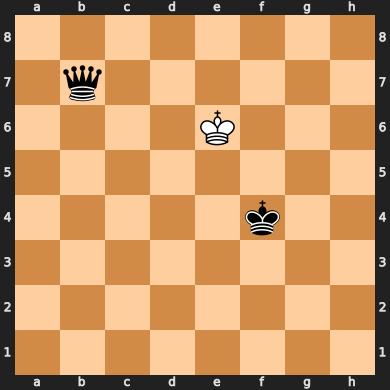

In [192]:
board = gen_rand_board_n_pieces(3)

board

In [193]:
import chess.gaviota

tablebase = chess.gaviota.PythonTablebase()
tablebase.add_directory("tablebase/Gaviota-Tablebases/")

In [194]:
tablebase.probe_wdl(board)

MissingTableError: 'no gaviota table available for: KvKQ'